# Esercitazione 9

**29 Aprile 2024**

*Gradiente e gradiente coniugato*

## Esercizio 1
Implementare la funzione **steepestdescent(A,b,x0,itmax,tol)** che implementa il metodo di discesa più ripida del gradiente per risolvere il sistema lineare Ax=b, con A matrice simmetrica e definita positiva. La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- itmax: iterazioni massime oltre le quali il metodo si ferma
- toll: tolleranza per il criterio di arresto

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente $ \frac{||r^{(k)}||_2} {||b||_2}$ iterazione per iterazione

- un array contenente le soluzioni ad ogni iterazione
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Usare come criterio di arresto $ \frac{||r^{(k)}||_2} {||b||_2} < toll$

In [3]:
import numpy as np
def steepestdescent(A,b,x0,itmax,tol):
 
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0

     
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x)
    vet_r=[]
    vet_r.append(errore)
     
# utilizzare il metodo del gradiente per trovare la soluzione
    while it<=itmax and errore >= tol:
        it=it+1
        Ap=A@p
       
        alpha = -(r.T@p)/(p.T@Ap)
                
        x = x+alpha*p
        
         
        vec_sol.append(x)
        r=r+alpha*Ap
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p =-r
        
     
    return x,vet_r,vec_sol,it

## Esercizio 1-Bis
Implementare la funzione **steepestdescent_CL(A,b,x0,itmax,X,Y,Z,tol)** da utilizzare solo nel caso n=2 che visualizza anche le curve di livello e l'iterato x_k.

N.B: f(x) è il funzionale quadratico da minimizzare (f(x)= <Ax,x>-<b,x>) ,
X,Y sono la discretizzazione del piano su cui costruire Z (ottenuta valutando f sui punti della griglia)

In [5]:
def steepestdescent_CL(A,b,x0,itmax,X,Y,Z,f,tol):
#solo per matrici di dimensioni 2
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0
    
    plt.contour(X, Y, Z, levels=f(x,A,b).flatten())
    plt.plot(x[0],x[1],'r-o')
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x)
    vet_r=[]
    vet_r.append(errore)
     
# utilizzare il metodo del gradiente per trovare la soluzione
    while errore>= tol and it< itmax:
        it=it+1
        Ap=A@p
        
        alpha = -(r.T@p)/(p.T@Ap)
        x = x + alpha*p
       
        
        plt.contour(X, Y, Z, levels=f(x,A,b).flatten())
        plt.plot(x[0],x[1],'ro')
        vec_sol.append(x)
        r=r+alpha*Ap
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r 
        
    plt.show()
    return x,vet_r,vec_sol,it

## Esercizio 2
Implementare la funzione **conjugate_gradient(A,b,x0,itmax,tol)** che implementa il metodo del gradiente coniugato per risolvere il sistema lineare Ax=b, con A matrice simmetrica e definita positiva. La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- itmax: iterazioni massime oltre le quali il metodo si ferma
- toll: tolleranza per il criterio di arresto

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente $ \frac{||r^{(k)}||_2} {||b||_2}$ iterazione per iterazione
- un array contenente le soluzioni ad ogni iterazione
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Usare come criterio di arresto $ \frac{||r^{(k)}||_2} {||b||_2} < toll$

In [7]:
def conjugate_gradient(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0
    
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0)
    vet_r=[]
    vet_r.append(errore)
# utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while errore >= tol and it< itmax:
        it=it+1
        Ap=A@p
        alpha = -(r.T@p)/(p.T@Ap)
        x =x+alpha*p
        vec_sol.append(x)
        rtr_old=r.T@r
        r=r+alpha*Ap
        gamma= (r.T@r)/rtr_old
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r + gamma*p
   
    
    return x,vet_r,vec_sol,it

## Esercizio 2-Bis
Implementare la funzione **conjugate_gradient_CL(A,b,x0,itmax,X,Y,Z,tol)** da utilizzare solo nel caso n=2 che visualizza anche le curve di livello e l'iterato x_k

In [9]:
import matplotlib.pyplot as plt
def conjugate_gradient_CL(A,b,x0,itmax,X,Y,Z,f,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0
    plt.contour(X, Y, Z, levels=f(x,A,b).flatten())
    plt.plot(x[0],x[1],'ro')
    
    r = A.dot(x)-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0)
    vet_r=[]
    vet_r.append(errore)
# utilizzare il metodo del gradiente coniugato per trovare la soluzione
    while errore >= tol and it< itmax:
        it=it+1
        Ap=A@p
       
        alpha = -(r.T@p)/(p.T@Ap)
        x = x + alpha *p
        plt.contour(X, Y, Z, levels=f(x,A,b).flatten())
        plt.plot(x[0],x[1],'ro')
        vec_sol.append(x)
        rtr_old=r.T@r
        r=r+alpha*Ap
        gamma=np.dot(r.T,r)/rtr_old
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r+gamma*p
   
    
    return x,vet_r,vec_sol,it

## Test didattici per il caso n=2, visualizzando le curve di livello

Risolvere il sistema lineare Ax=b, dove A=np.array([[8,4],[4,3]]) e b=np.array([8,10]), utilizzando
il metodo del gradiente e del gradiente coniugato con la visualizzazione grafica delle curve di livello e della soluzione ad ogni iterazione. Si selezioni l'iterato iniziale x0=[0,0], itmax=200
tol=1e-10. Si confrontino le iterazioni effettuate da ciascuno dei due metodi e si visualizzi  $ \frac{||r^{(k)}||_2} {||b||_2}$ ad ogni iterazione.

Soluzione con metodo del gradiente:  [-2.  6.]
Soluzione con metodo del gradiente coniugato:  [-2.  6.]


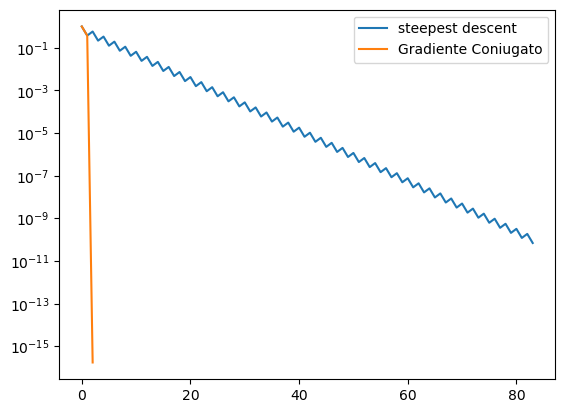

In [12]:
A=np.array([[8,4],[4,3]]) 
b=np.array([8,10])
x0=np.array([0,0])
tol=1e-10
itmax=200

x,vet_r,vec_sol,it=steepestdescent(A,b,x0,itmax,tol)
x_grad,vet_r_grad,vec_sol_grad,it_grad=conjugate_gradient(A,b,x0,itmax,tol)
print("Soluzione con metodo del gradiente: ",x)
print("Soluzione con metodo del gradiente coniugato: ",x_grad)

plt.semilogy(range(it+1),vet_r,label='steepest descent')
plt.semilogy(range(it_grad+1),vet_r_grad,label='Gradiente Coniugato')
plt.legend()
plt.show()

## Esercizio 3
Scrivere una funzione creaPoisson(n) che preso in input l'ordine della matrice quadrata di Poisson la costruzione secondo la seguente formula:
$$A =
\left [
\begin{array}{ccccccccccc}
4 & -1 & 0 & -1 &0 &0 & 0& 0& \cdots &   0 & 0\\
-1 & 4 & -1 & 0  &-1 &0 & 0& 0& \cdots &   0 & 0\\
0 & -1 & 4 & -1  &0 &-1 & 0& 0& \cdots &   0 & 0 \\
-1 & 0 & -1 & 4  &-1 &0  & -1 & 0& \cdots &   0 & 0\\
0 & -1 & 0 & -1  & 4 &-1 & 0 & -1& \cdots &   0 & 0\\
0 & 0 & -1 & 0  & -1 &4 & -1 & 0&  -1 & 0 & 0 \\
0 & 0 & 0 & \ddots  & 0 &\ddots & \ddots & \ddots& \ddots & \ddots & 0\\
0 & 0 & 0 & 0  & -1 &0  & -1 & 4& -1 &   0& -1\\
\end{array}
 \right ], \qquad
$$

- Risolvere il sistema lineare Ax=b con matrice dei coefficienti A di Poisson con ordine che va da 10 a 100 con step 2,  e termine noto b scelto in maniera tale che il sistema abbia soluzione il vettore x con tutte le componenti  uguali ad 1, utilizzando  il metodo iterativo del gradiente e del gradiente coniugato  

In [14]:
def creaPoisson(n):
    #costruire una matrice di Poisson
    d=np.ones((n))*4
    e=-np.ones((n-1,))
    f=-np.ones((n-3,))
    A=np.diag(d)+np.diag(e,-1)+np.diag(e,1)+np.diag(f,-3)+np.diag(f,3)
    return A

n= 10


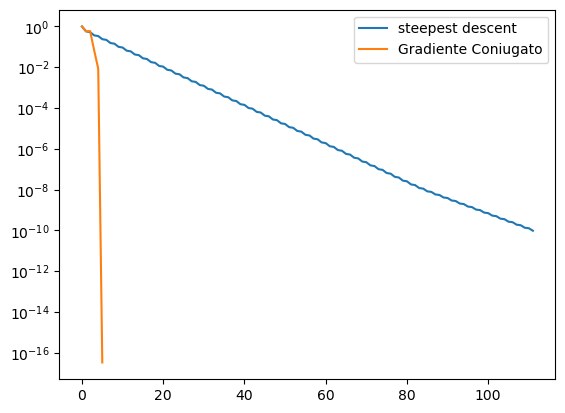

n= 12


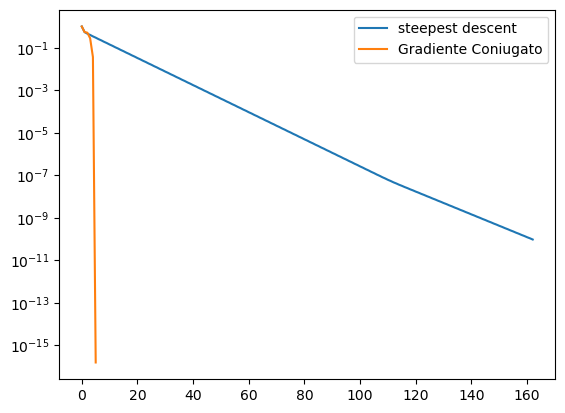

n= 14


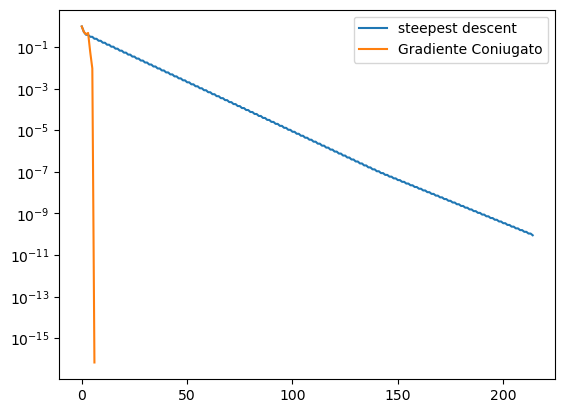

n= 16


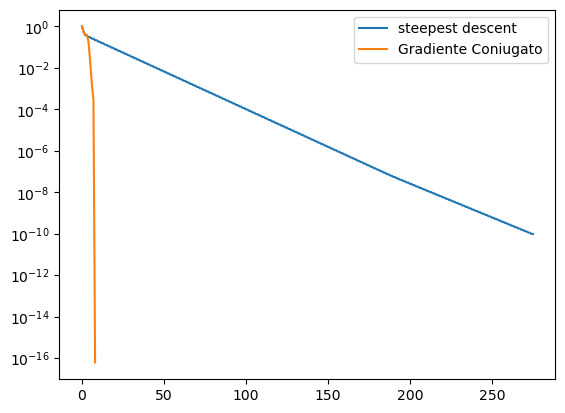

n= 18


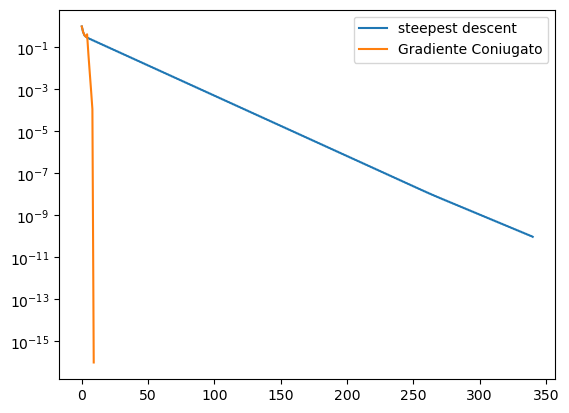

n= 20


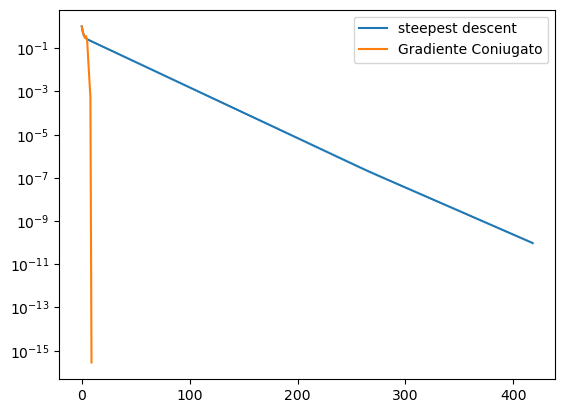

n= 22


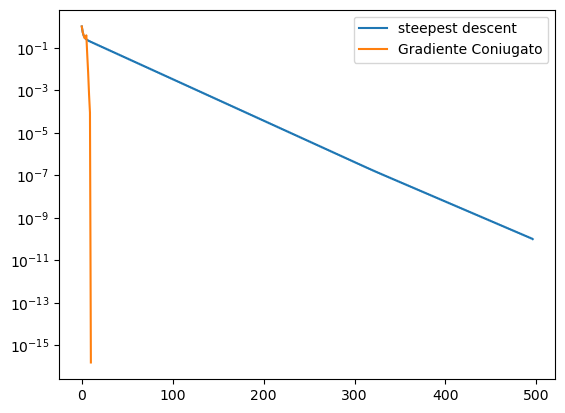

n= 24


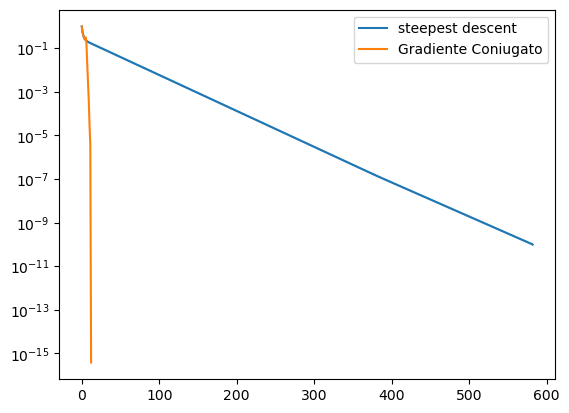

n= 26


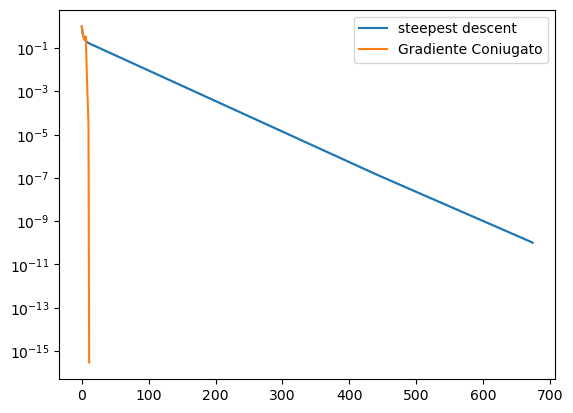

n= 28


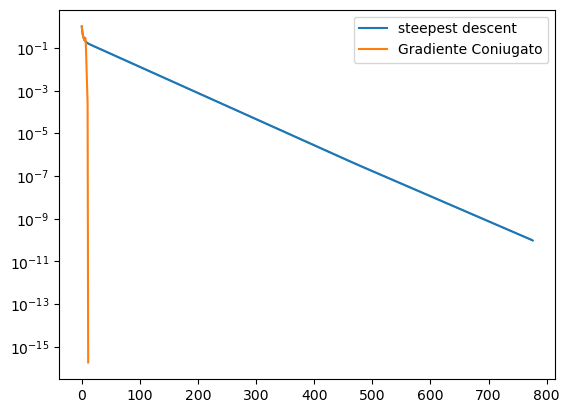

n= 30


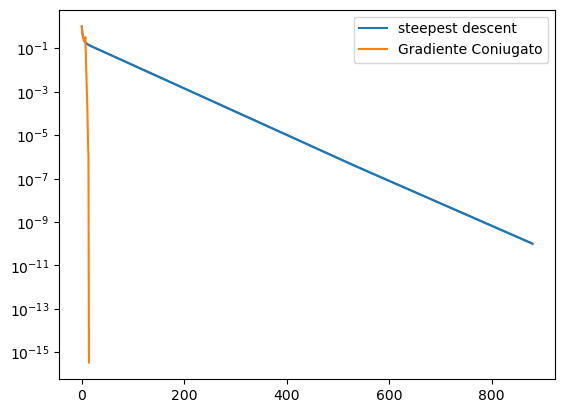

n= 32


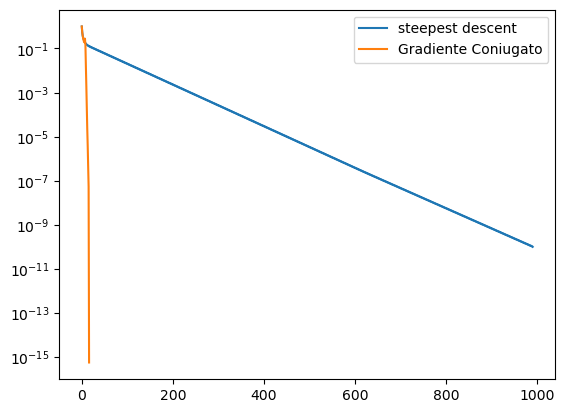

n= 34


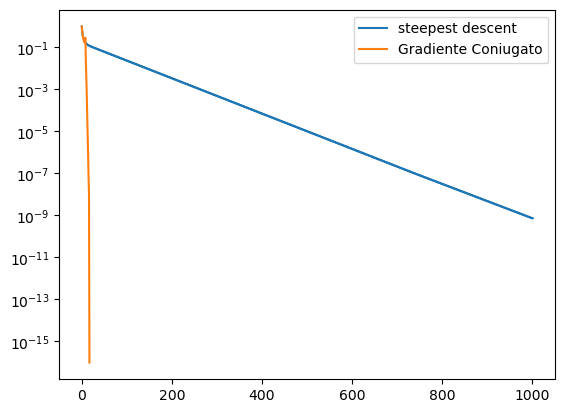

n= 36


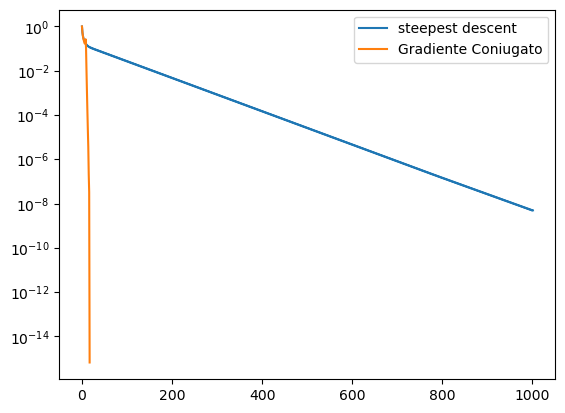

n= 38


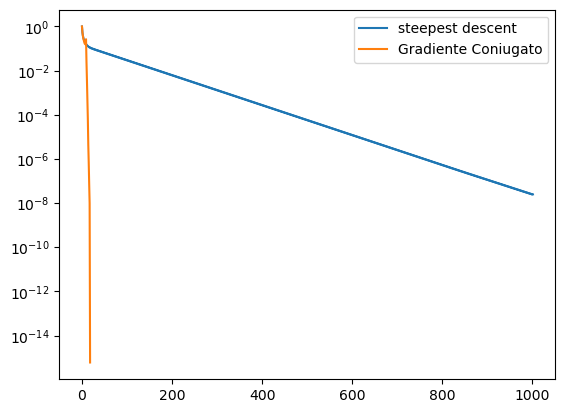

n= 40


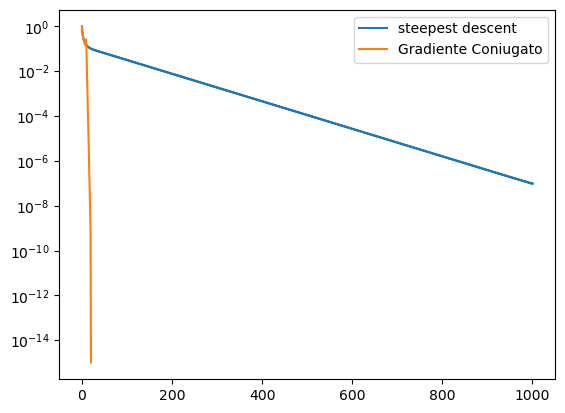

n= 42


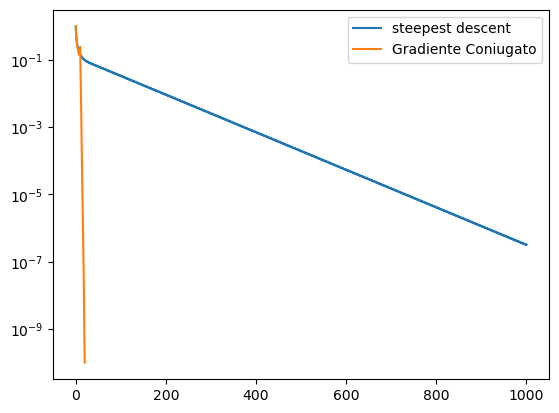

n= 44


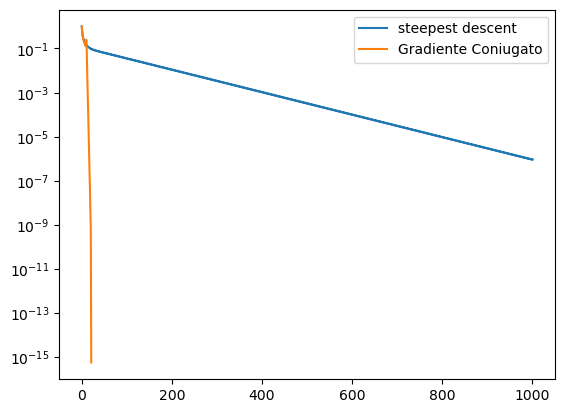

n= 46


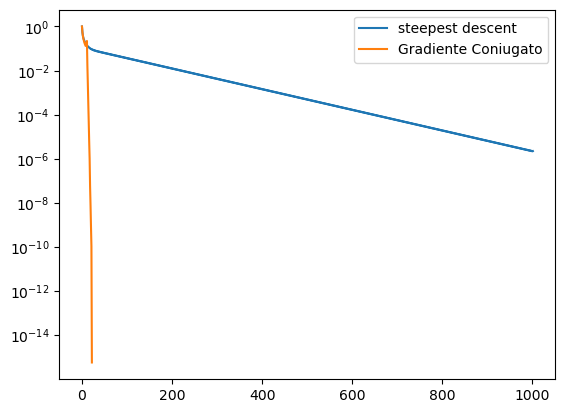

n= 48


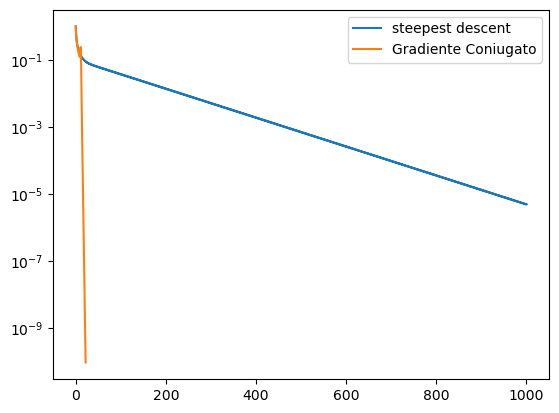

n= 50


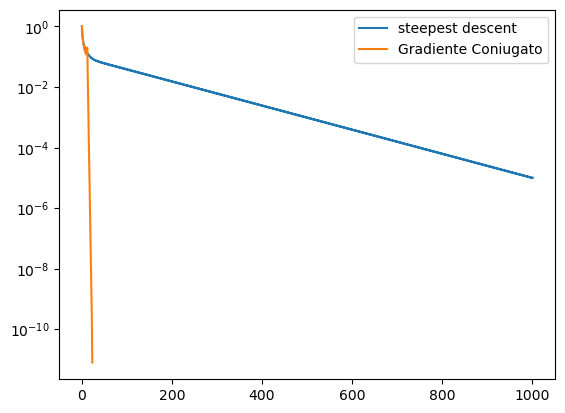

n= 52


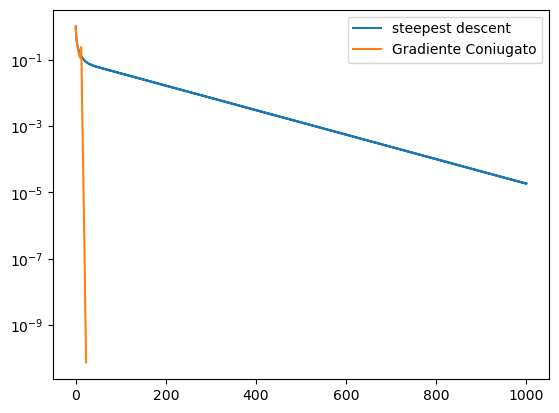

n= 54


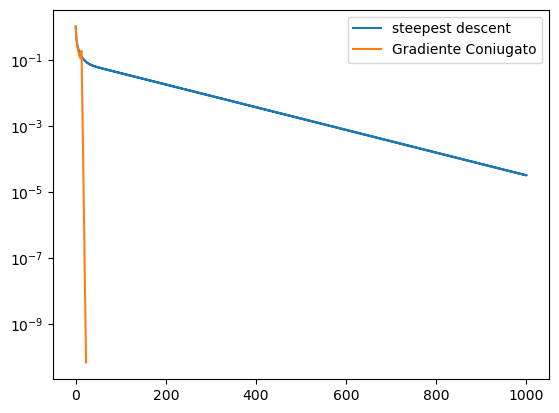

n= 56


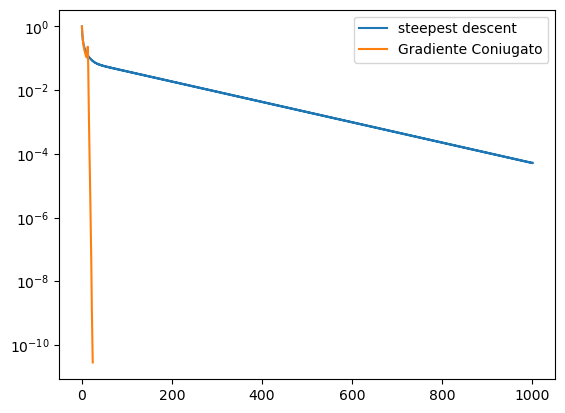

n= 58


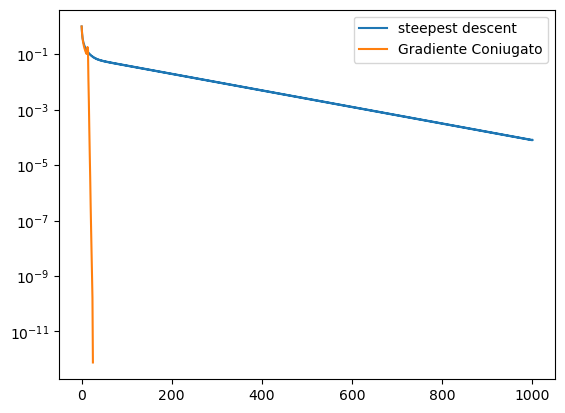

n= 60


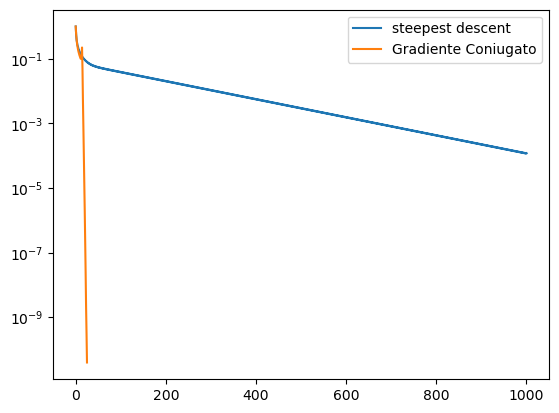

n= 62


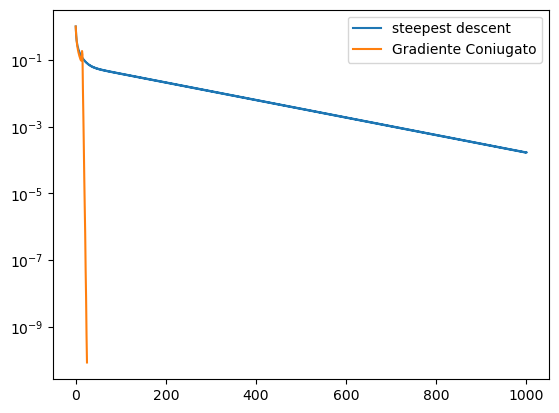

n= 64


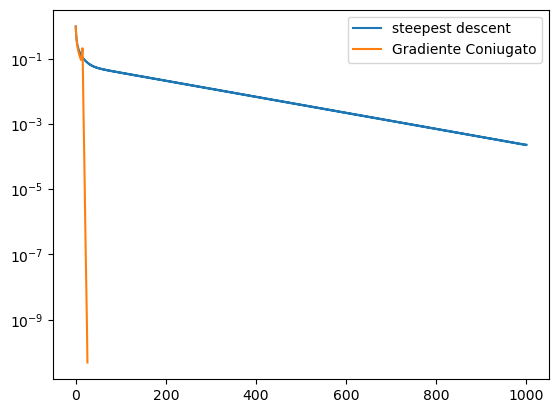

n= 66


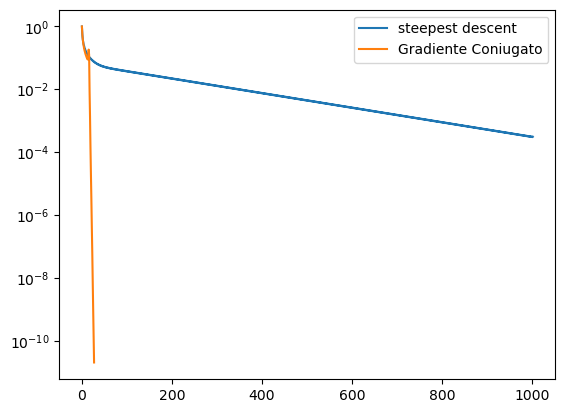

n= 68


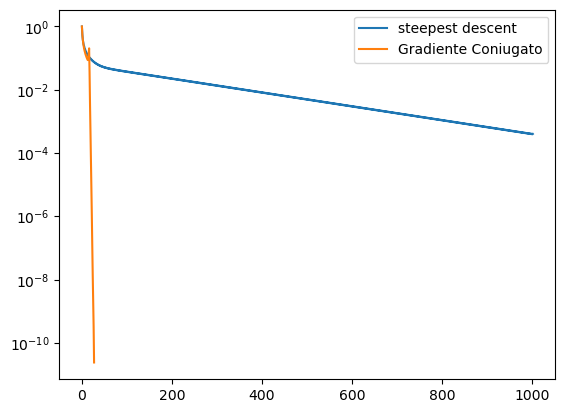

n= 70


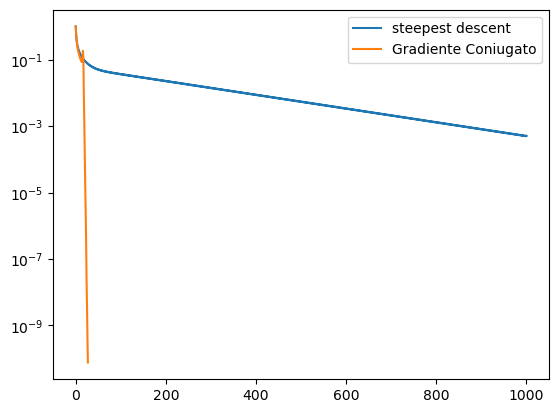

n= 72


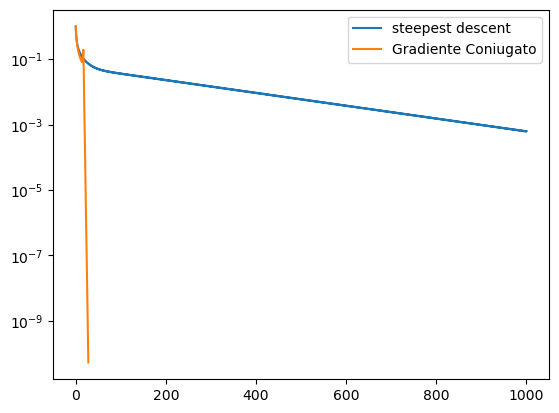

n= 74


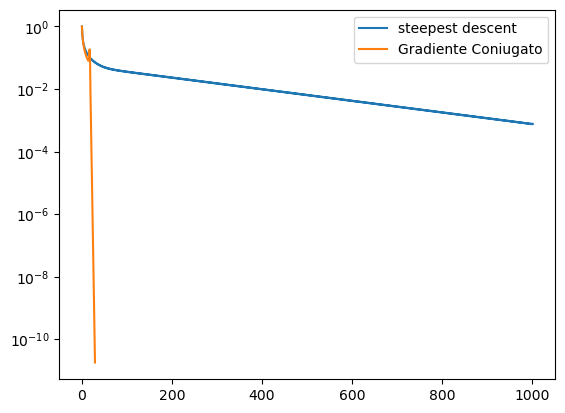

n= 76


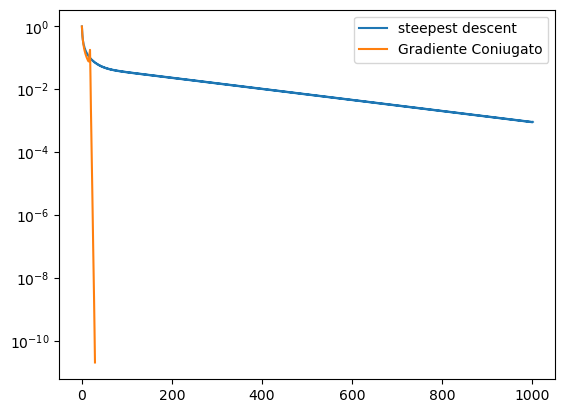

n= 78


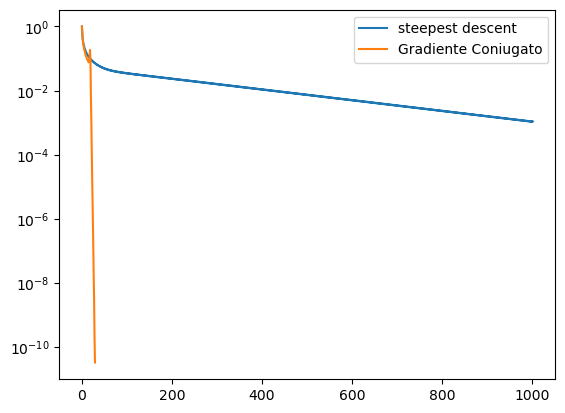

n= 80


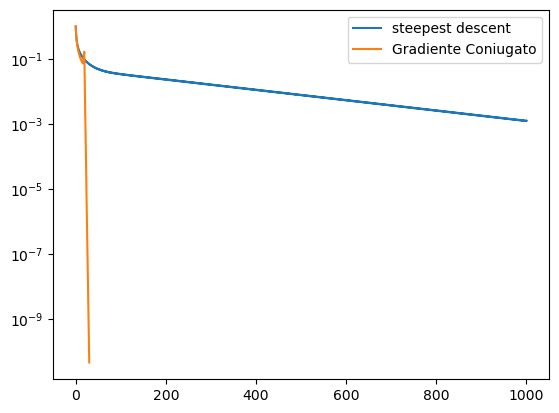

n= 82


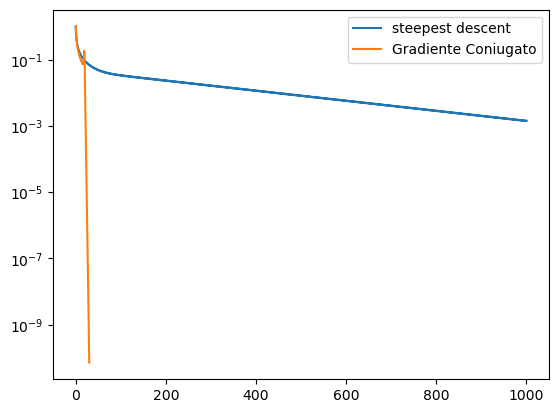

n= 84


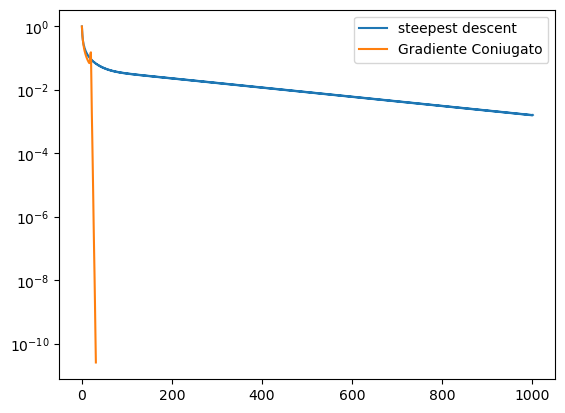

n= 86


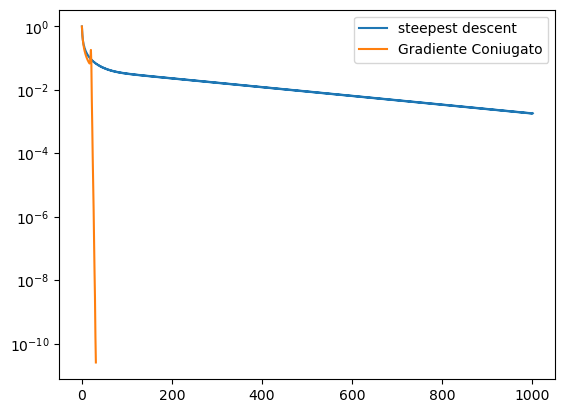

n= 88


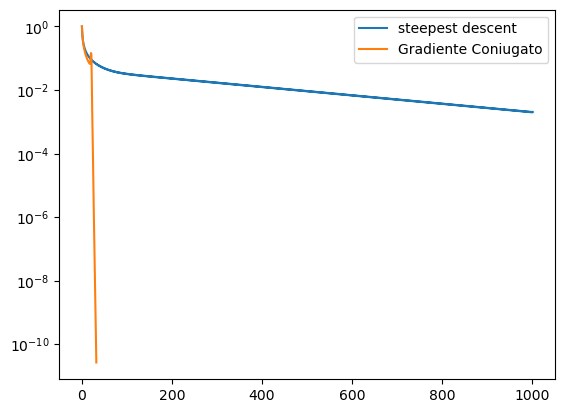

n= 90


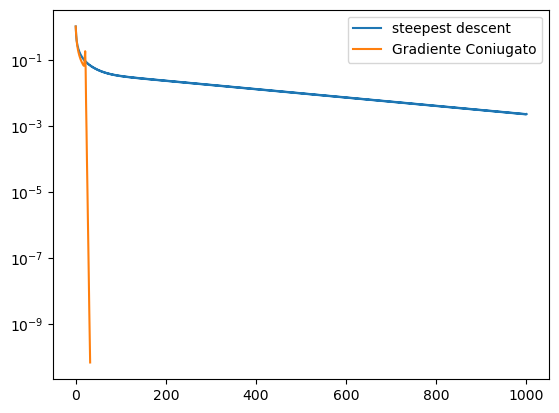

n= 92


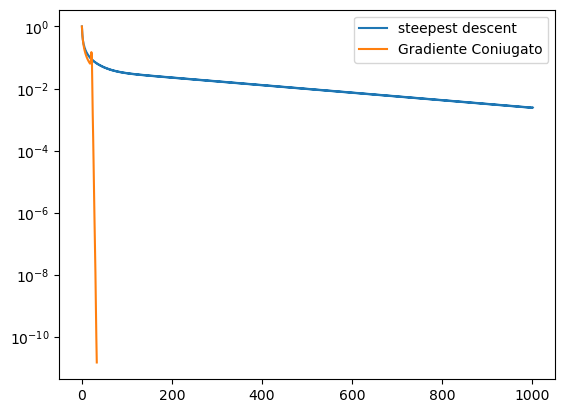

n= 94


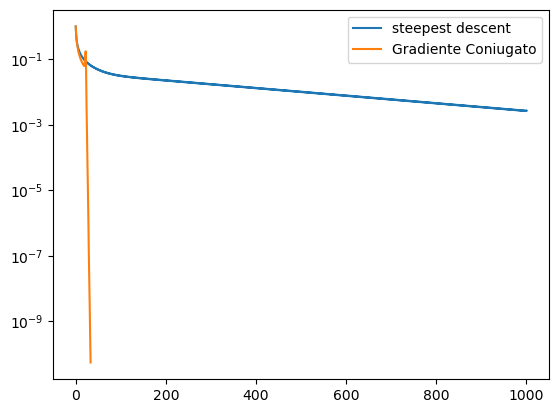

n= 96


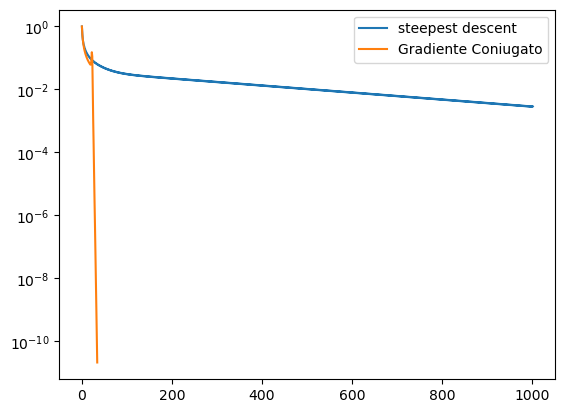

n= 98


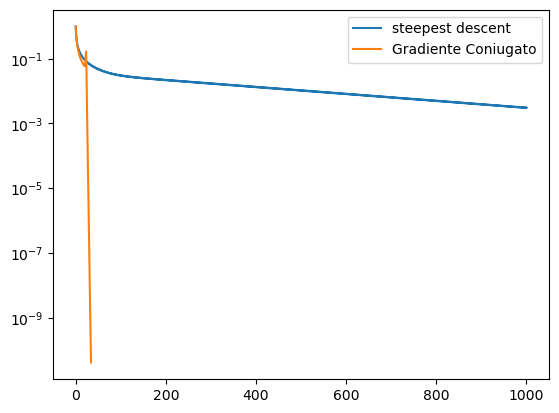

In [15]:
order=np.arange(10,100,step=2,dtype=int)
itmax=1000
tol=1e-10
for n in order:
    x0=np.zeros((n,1))
    A = creaPoisson(n)
    b=np.sum(A,axis=1).reshape(n,1)
    x_Steep,vet_r_Steep,vec_sol_Steep,it_Steep=steepestdescent(A,b,x0,itmax,tol)
    x_grad,vet_r_grad,vec_sol_grad,it_grad=conjugate_gradient(A,b,x0,itmax,tol)
    print("n=",n)
    plt.semilogy(range(it_Steep+1),vet_r_Steep,label='steepest descent')
    plt.semilogy(range(it_grad+1),vet_r_grad,label='Gradiente Coniugato')
    plt.legend()
    plt.show()
    


## Esercizio 4
Consideriamo il sistema lineare Ax=b  dov A è  la matrice di Hilbert di dimensione 5, costruita usando la funzione hilbert(n) di scipy.linalg (A=scipy.linalg.hilbert(5)) in modo tale che la soluzione esatta sia $x = (1, 1, . . . , 1)^T$ .
Risolvere il sistema lineare usando sia il metodi del gradiente che il metodo del gradiente coniugato e confrontarne gli errori ad ogni iterazione.

Soluzione con metodo del gradiente:  [[1.00132703]
 [0.98814323]
 [1.01676685]
 [1.01027197]
 [0.98225357]]
Soluzione con metodo del gradiente coniugato:  [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
condizionamento di A: 4.766073e+05


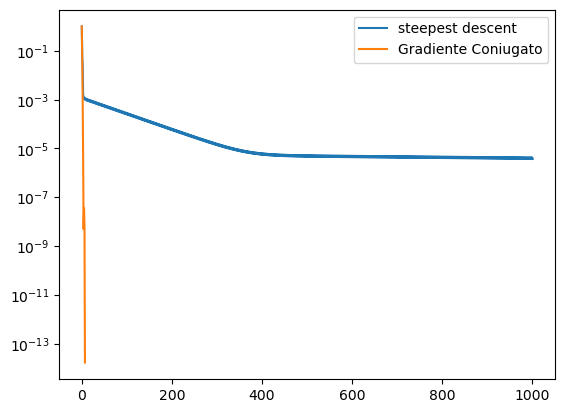

In [17]:
import scipy.linalg as spi

A = spi.hilbert(5)
b = np.sum(A, axis=1).reshape(5, 1)
xEsatta = np.full((5, 1), 1)
x0 = np.zeros((5, 1))
itmax = 1000
tol = 1e-10
x_Steep, vet_r_Steep, vec_sol_Steep, it_Steep = steepestdescent(A, b, x0, itmax, tol)
x_grad, vet_r_grad, vec_sol_grad, it_grad = conjugate_gradient(A, b, x0, itmax, tol)
print("Soluzione con metodo del gradiente: ", x_Steep)
print("Soluzione con metodo del gradiente coniugato: ", x_grad)
print("condizionamento di A: {:e}".format(np.linalg.cond(A)))
plt.semilogy(range(it_Steep + 1), vet_r_Steep, label='steepest descent')
plt.semilogy(range(it_grad + 1), vet_r_grad, label='Gradiente Coniugato')
plt.legend()
plt.show()

## Esercizio 5
Importare il file creaG ed utilizzare le funzioni sottospecificate per creare, scelto $n$,  una matrice D di ordine $m=(n-2)^2$

*import creaG*

*G = creaG.numgrid(n)*

*D = creaG.delsq(G).todense().getA()*

Risolvere il sistema lineare Dx=b, con matrice G di ordine m=16 ed ordine m=400, (scegliere n in maniera opportuna), usando i metodi del gradiente e del gradiente coniugato. Confrontare gli errori su uno stesso grafico e giustifcare i risultati alla luce del risultato teorico della maggiorazione dell'errore per entrambi i metodi

n= 6


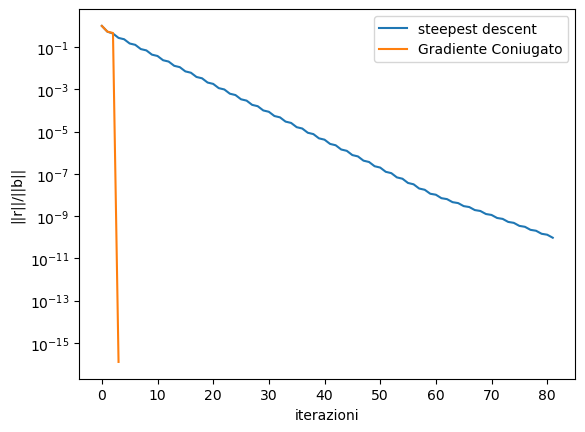

condizionamento di D: 9.472136e+00
GRADIENTE (Steepest) 
l'indice di condizionamento della matrice influenza la velocità di convergenza del metodo: maggiore è l'indice di condizionamento 
 più vicono ad 1 ed il fattore di riduzione dell'errore : 8.821327e-01
GRADIENTE CONIUGATO
l'indice di condizionamento della matrice influenza la velocità di convergenza del metodo 
 ma meno gravemente rispetto al metodo del gradiente:
 maggiore è l'indice di condizionamento, più vicono ad 1 ed il fattore di riduzione dell'errore.: 9.392192e-01
n= 22


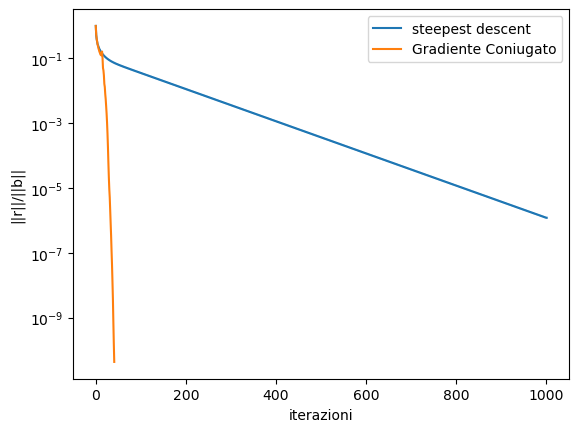

condizionamento di D: 1.780643e+02
GRADIENTE (Steepest) 
l'indice di condizionamento della matrice influenza la velocità di convergenza del metodo: maggiore è l'indice di condizionamento 
 più vicono ad 1 ed il fattore di riduzione dell'errore : 9.990005e-01
GRADIENTE CONIUGATO
l'indice di condizionamento della matrice influenza la velocità di convergenza del metodo 
 ma meno gravemente rispetto al metodo del gradiente:
 maggiore è l'indice di condizionamento, più vicono ad 1 ed il fattore di riduzione dell'errore.: 9.995001e-01


In [19]:
import creaG
import math

orders= np.array([6,22])
itmax=1000
tol=1e-10
for i in orders:
    G=creaG.numgrid(i)
    D=creaG.delsq(G).todense().getA()
    b=np.sum(D,axis=1).reshape(D.shape[0])
    x0=np.zeros_like(b)
    x_Steep,vet_r_Steep,vec_sol_Steep,it_Steep=steepestdescent(D,b,x0,itmax,tol)
    x_grad,vet_r_grad,vec_sol_grad,it_grad=conjugate_gradient(D,b,x0,itmax,tol)
    print("n=",i)
    plt.semilogy(range(it_Steep+1),vet_r_Steep,label='steepest descent')
    plt.semilogy(range(it_grad+1),vet_r_grad,label='Gradiente Coniugato')
    plt.ylabel('||r||/||b||')
    plt.xlabel('iterazioni')
    plt.legend()
    plt.show()

    print("condizionamento di D: {:e}".format(np.linalg.cond(D)))
    print("GRADIENTE (Steepest) ")
    print("l'indice di condizionamento della matrice influenza la velocità di convergenza del metodo: maggiore è l'indice di condizionamento \n più vicono ad 1 ed il fattore di riduzione dell'errore : {:e}".format(np.linalg.cond(D-1)/np.linalg.cond(D+1)))
    print("GRADIENTE CONIUGATO")
    print("l'indice di condizionamento della matrice influenza la velocità di convergenza del metodo \n ma meno gravemente rispetto al metodo del gradiente:\n maggiore è l'indice di condizionamento, più vicono ad 1 ed il fattore di riduzione dell'errore.: {:e}".format(math.sqrt(np.linalg.cond(D-1))/math.sqrt(np.linalg.cond(D+1))))